In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Pants', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

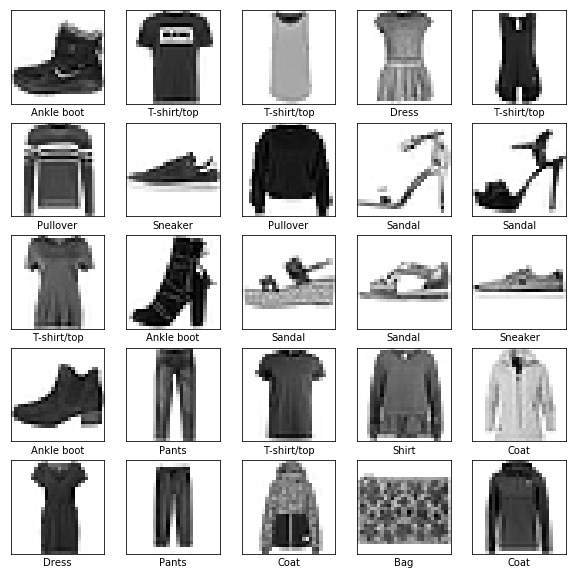

In [3]:
#Preprocess data
train_images = train_images/255.0
test_images = test_images/255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
#Set up layers
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),\
              keras.layers.Dense(128, activation=tf.nn.relu),\
              keras.layers.Dense(10, activation=tf.nn.softmax)])

#Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 40s 668us/sample - loss: 0.4986 - acc: 0.8245
Epoch 2/5
60000/60000 [==============================] - 39s 643us/sample - loss: 0.3745 - acc: 0.8645
Epoch 3/5
60000/60000 [==============================] - 39s 647us/sample - loss: 0.3371 - acc: 0.8757
Epoch 4/5
60000/60000 [==============================] - 38s 634us/sample - loss: 0.3127 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 38s 636us/sample - loss: 0.2948 - acc: 0.8916


In [12]:
#Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 3s 350us/sample - loss: 0.3431 - acc: 0.8784
Test accuracy: 0.8784


In [5]:
#Make predictions
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],\
                                  100*np.max(predictions_array),\
                                  class_names[true_label]),\
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label =  predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

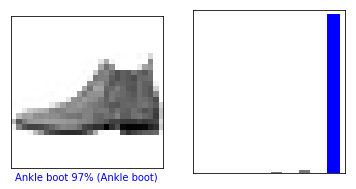

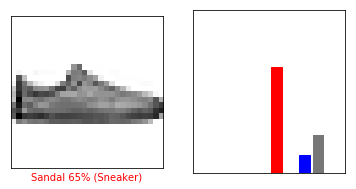

In [10]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

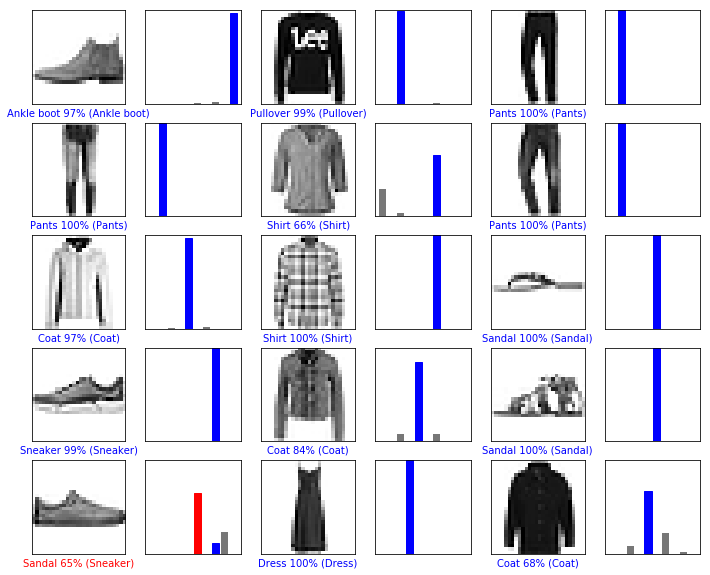

In [8]:
numRows = 5
numCols = 3
numImages = numRows*numCols
plt.figure(figsize=(2*2*numCols, 2*numRows))
for i in range(numImages):
    plt.subplot(numRows, 2*numCols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(numRows, 2*numCols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [26]:
img = test_images[0]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

(28, 28)
(1, 28, 28)
[[6.7747771e-07 2.9343779e-09 4.2139993e-07 1.2087197e-08 1.1944846e-07
  5.2258773e-03 1.0363422e-05 2.8902059e-02 1.3519866e-05 9.6584696e-01]]


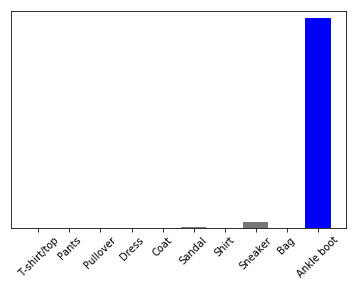

In [27]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()